Create a Long Short-Term Memory (LSTM) implementation guiding through essential steps such as data preparation, designing the LSTM model architecture, and training for effective sequential data analysis.



Data Preparation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [ ]:
# Generate a synthetic time series (sine wave) as an example
def create_time_series(n_steps):
    time = np.linspace(0, 100, n_steps)
    series = np.sin(time)
    return series

n_steps = 1000
series = create_time_series(n_steps)

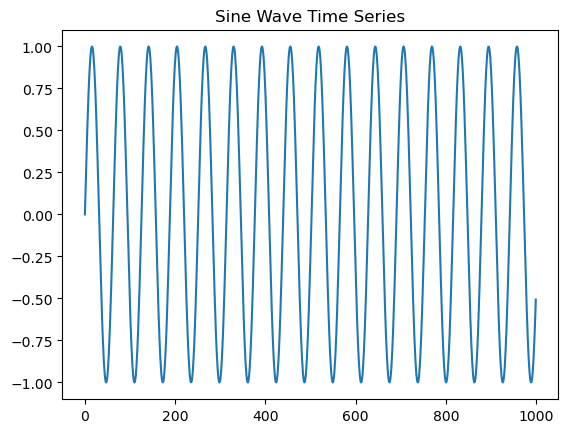

In [ ]:
# Plot the time series
plt.plot(series)
plt.title("Sine Wave Time Series")
plt.show()

In [ ]:
# Prepare the data
def create_sequences(data, n_steps):
    sequences = []
    labels = []
    for i in range(len(data) - n_steps):
        sequence = data[i:i + n_steps]
        label = data[i + n_steps]
        sequences.append(sequence)
        labels.append(label)
    return np.array(sequences), np.array(labels)

In [ ]:
# Define time window
n_input_steps = 50

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_series = scaler.fit_transform(series.reshape(-1, 1))

# Create sequences and labels
X, y = create_sequences(scaled_series, n_input_steps)

# Reshape input for LSTM [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

Designing the LSTM Model Architecture

In [ ]:
# LSTM Model Design
model = Sequential()

# Add LSTM layer with 50 units and return_sequences=True for stacking layers
model.add(LSTM(50, activation='relu', input_shape=(n_input_steps, 1)))

# Add a Dense layer for output (single value prediction)
model.add(Dense(1))

# Compile the model with Mean Squared Error loss and Adam optimizer
model.compile(optimizer='adam', loss='mse')

# Print model summary
model.summary()


D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Training the LSTM Model

Training the LSTM Model

Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.1929 - val_loss: 0.0576
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0472 - val_loss: 0.0325
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0297 - val_loss: 0.0171
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0129 - val_loss: 0.0035
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0030 - val_loss: 8.0962e-04
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.8608e-04 - val_loss: 1.9704e-04
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 1.6026e-04 - val_loss: 9.2630e-05
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 7.6505e-05 - val_loss: 6.1017e-05
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.6109e-05 - val_loss: 2.9390e-05
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.3830e-05 - val_loss: 1.3825e-05
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.2139e-05 - val_loss: 8.4637e-06
Epoch 12/50

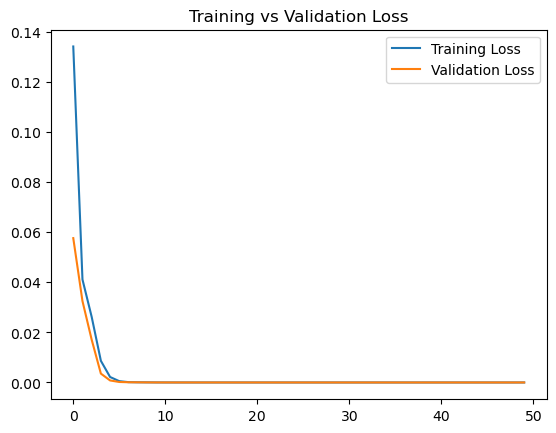

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot training loss vs validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


Model Evaluation and Prediction

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step


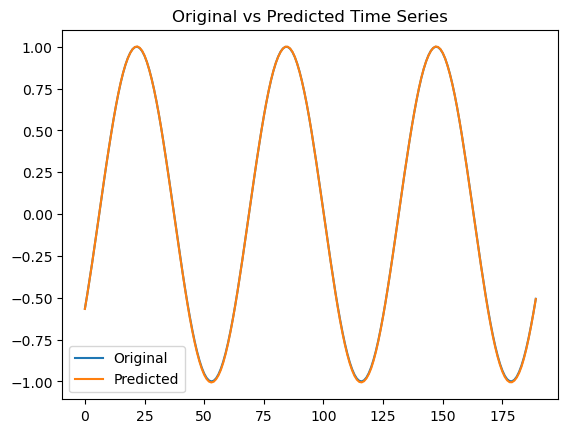

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Inverse scale the predictions back to original scale
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Plot the original vs predicted time series
plt.plot(y_test_rescaled, label='Original')
plt.plot(y_pred_rescaled, label='Predicted')
plt.legend()
plt.title("Original vs Predicted Time Series")
plt.show()
